In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
sample_submission = pd.read_csv('sample_submission.csv')

**Information about columns:**

1. User_ID - User ID
2. Product_ID - Product ID
3. Gender - Sex of User
4. Age - Age in bins
5. Occupation - Occupation (Masked)
6. City_Category -	Category of the City (A,B,C)
7. Stay_In_Current_City_Years - Number of years stay in current city
8. Marital_Status - Marital Status
9. Product_Category_1 - Product Category (Masked)
10. Product_Category_2 - Product may belongs to other category also (Masked)
11. Product_Category_3 - Product may belongs to other category also (Masked)
12. Purchase - Purchase Amount (Target Variable)

In [3]:
train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


### Exploratory Data Analysis

In [4]:
# Main information about train and test data
print('Train data\nAmount of rows: {}; Amount of columns: {}\n'.format(train.shape[0], train.shape[1]))
print('Test data\nAmount of rows: {}; Amount of columns: {}\n'.format(test.shape[0], test.shape[1]))

Train data
Amount of rows: 550068; Amount of columns: 12

Test data
Amount of rows: 233599; Amount of columns: 11



In [5]:
# Search missing values in data
print('Amount of missing values in train data: {}\nAmount of missing values in test data: {}'.format(train.isnull().sum().sum(),
                                                                                                     test.isnull().sum().sum()))

Amount of missing values in train data: 556885
Amount of missing values in test data: 234906


In [6]:
# Missing values in train data
missing_vals = train.isnull().sum()
cols_type = train.dtypes
missing_vals = pd.concat([missing_vals, cols_type], axis=1).reset_index().rename(columns={'index': 'columns',
                                                                                          0: 'missing_values',
                                                                                          1: 'col_type'})
missing_vals = missing_vals[missing_vals['missing_values'] != 0]
missing_vals

,columns,missing_values,col_type
9,Product_Category_2,173638,float64
10,Product_Category_3,383247,float64


In [7]:
# Missing values in test data
missing_vals_test = test.isnull().sum().reset_index().rename(columns={'index': 'columns',
                                                                      0: 'missing_values'})
missing_vals_test = missing_vals_test[missing_vals_test['missing_values'] != 0]
missing_vals_test

,columns,missing_values
9,Product_Category_2,72344
10,Product_Category_3,162562


In [8]:
# Percentage of missing values in data
missing_vals['percentage'] = round((missing_vals['missing_values'] / train.shape[0]) * 100, 2)
missing_vals_test['percentage'] = round((missing_vals_test['missing_values'] / test.shape[0]) * 100, 2)
print('Missing values with percentage in train data:\n{}\n\nMissing values with percentage in test data:\n {}'.format(missing_vals, missing_vals_test))

Missing values with percentage in train data:
               columns  missing_values col_type  percentage
9   Product_Category_2          173638  float64       31.57
10  Product_Category_3          383247  float64       69.67

Missing values with percentage in test data:
                columns  missing_values  percentage
9   Product_Category_2           72344       30.97
10  Product_Category_3          162562       69.59


In [9]:
# Remove column with percentage of missing values more than 69%
train = train.drop(columns='Product_Category_3')
test = test.drop(columns='Product_Category_3')

In [10]:
# Main information about 'Product_Category_2'
train['Product_Category_2'].describe()

count    376430.000000
mean          9.842329
std           5.086590
min           2.000000
25%           5.000000
50%           9.000000
75%          15.000000
max          18.000000
Name: Product_Category_2, dtype: float64

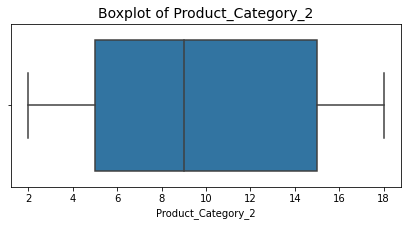

In [11]:
plt.figure(figsize=(7, 3))
sns.boxplot(train['Product_Category_2'], orient='v')
plt.title('Boxplot of Product_Category_2', size=14)
plt.show()

In [12]:
# Frequency of values in Product_Category_2
train['Product_Category_2'].value_counts().head()

8.0     64088
14.0    55108
2.0     49217
16.0    43255
15.0    37855
Name: Product_Category_2, dtype: int64

In [13]:
# Replace missing values on the most frequent
train['Product_Category_2'] = train['Product_Category_2'].fillna(train['Product_Category_2'].value_counts().index[0])
test['Product_Category_2'] = test['Product_Category_2'].fillna(train['Product_Category_2'].value_counts().index[0])

In [14]:
# Amount of missing values in data
print('Amount of missing values in train data: {}\nAmount of missing values in test data: {}'.format(train.isnull().sum().sum(),
                                                                                                     test.isnull().sum().sum()))

Amount of missing values in train data: 0
Amount of missing values in test data: 0


In [15]:
# Analysis of continuous value
train['Purchase'].describe()

count    550068.000000
mean       9263.968713
std        5023.065394
min          12.000000
25%        5823.000000
50%        8047.000000
75%       12054.000000
max       23961.000000
Name: Purchase, dtype: float64

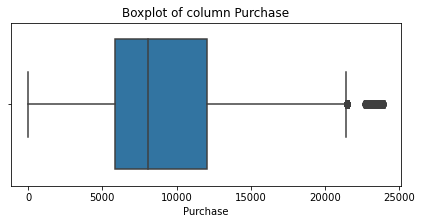

In [16]:
plt.figure(figsize=(7, 3))
sns.boxplot(train['Purchase'])
plt.title('Boxplot of column Purchase')
plt.show()

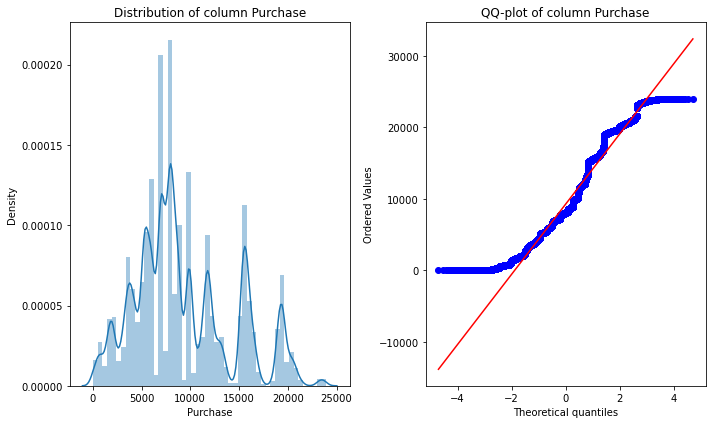

In [17]:
from scipy.stats import probplot
fig, ax = plt.subplots(1, 2, figsize=(10, 6))
for i in range(2):
   if i == 0:
       sns.distplot(train['Purchase'], ax=ax[i])
       ax[i].set_title('Distribution of column Purchase')
   else:
       probplot(train['Purchase'], plot=ax[i])
       ax[i].set_title('QQ-plot of column Purchase')
fig.tight_layout()
plt.show()

In [18]:
def create_barplot(figsize=(10, 6), x=None, y=None, hue=None, palette='Blues', xlabel='', ylabel='', title='', axhline=None):
    plt.figure(figsize=figsize)
    sns.barplot(x=x, y=y, hue=hue, palette=palette, ci=None)
    plt.xlabel(xlabel, size=14)
    plt.ylabel(ylabel, size=14)
    plt.title(title, size=16)
    if axhline is not None:
        plt.axhline(axhline, linestyle='--', color='navy')
    plt.show()

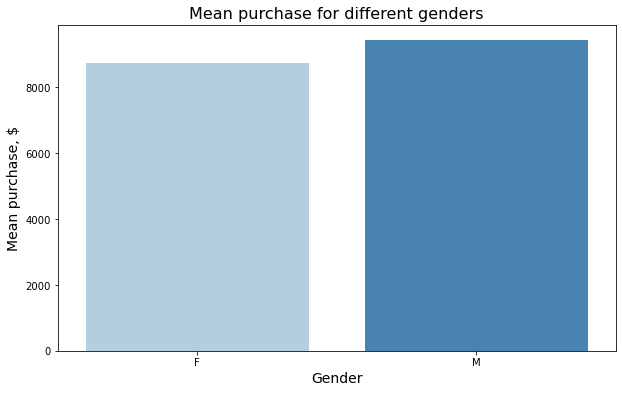

In [19]:
# Create visualizations
data1 = train.groupby('Gender', as_index=False).agg({'Purchase': 'mean'})
create_barplot(x=data1['Gender'], y=data1['Purchase'], xlabel='Gender', ylabel='Mean purchase, $',
               title='Mean purchase for different genders')

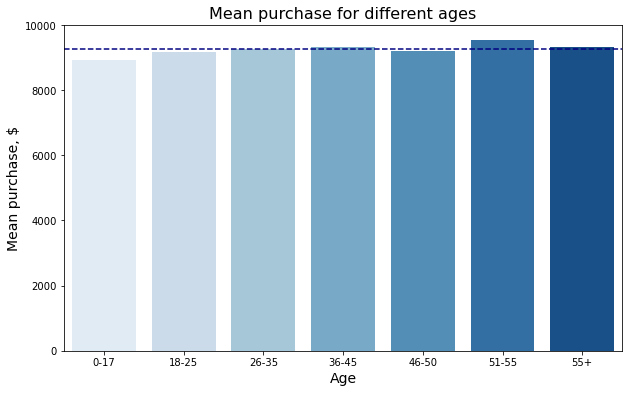

In [20]:
data2 = train.groupby('Age', as_index=False).agg({'Purchase': 'mean'})
create_barplot(x=data2['Age'], y=data2['Purchase'], xlabel='Age', ylabel='Mean purchase, $',
               title='Mean purchase for different ages', axhline=data2['Purchase'].mean())

In [21]:
def define_ages(x):
    if x == '51-55':
        return 2
    elif x == '36-45' or x == '55+':
        return 1
    else:
        return 0


train['category_of_ages'] = train['Age'].apply(define_ages)
test['category_of_ages'] = test['Age'].apply(define_ages)

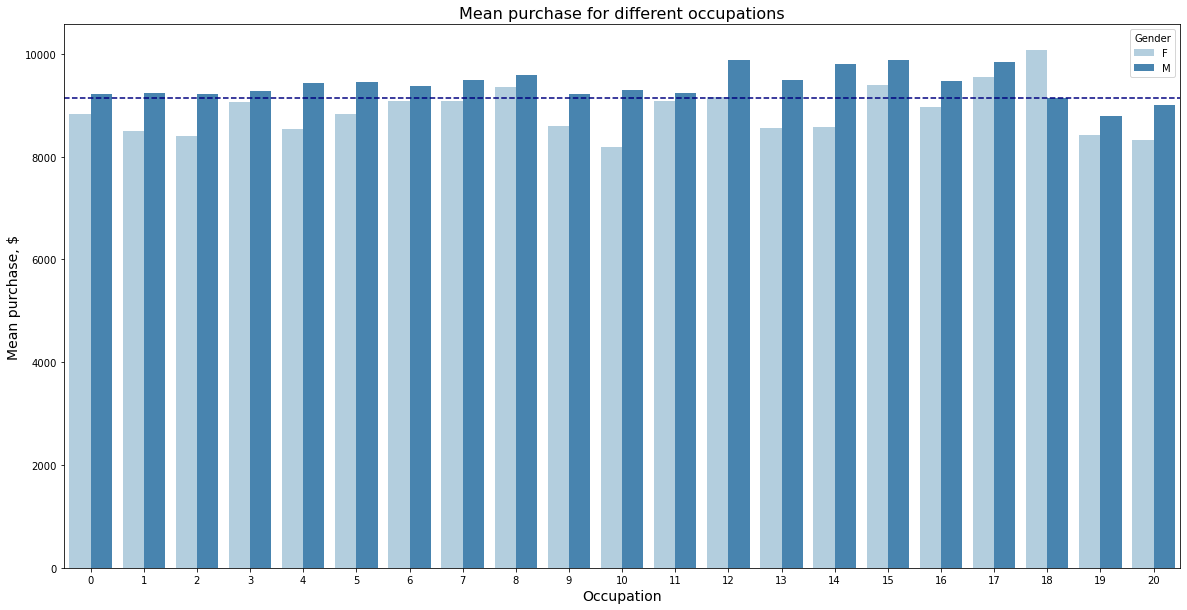

In [22]:
data3 = train.groupby(['Occupation', 'Gender'], as_index=False).agg({'Purchase': 'mean'})
create_barplot(figsize=(20, 10), x=data3['Occupation'], y=data3['Purchase'], hue=data3['Gender'],
               xlabel='Occupation', ylabel='Mean purchase, $', title='Mean purchase for different occupations',
               axhline=data3['Purchase'].mean())

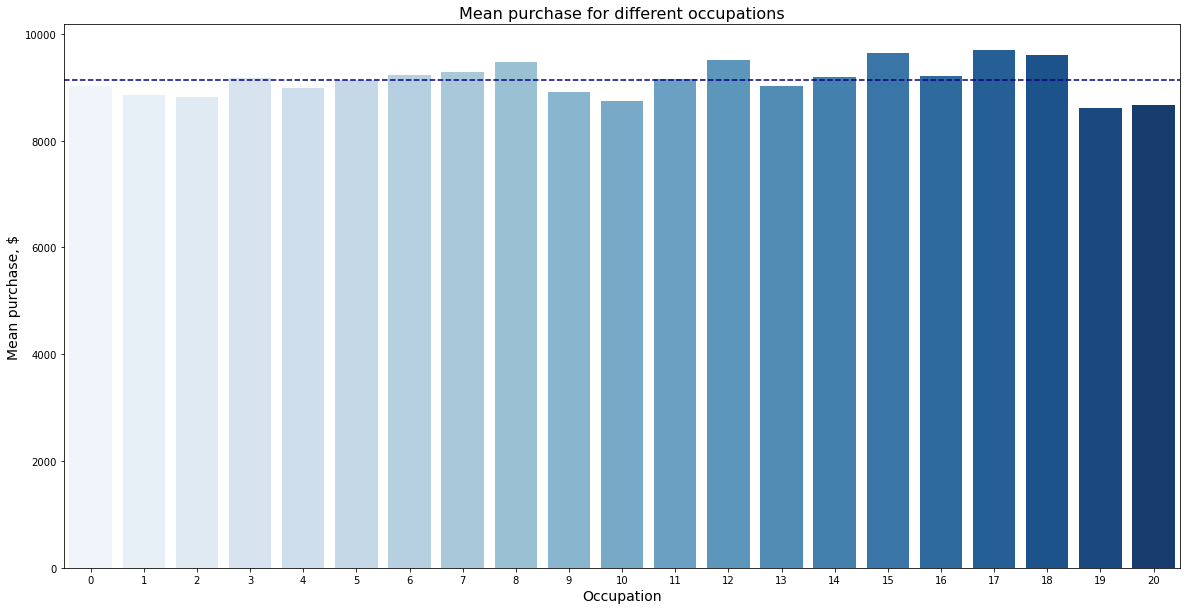

In [23]:
data4 = train.groupby('Occupation', as_index=False).agg({'Purchase': 'mean'})
create_barplot(figsize=(20, 10), x=data3['Occupation'], y=data3['Purchase'],
               xlabel='Occupation', ylabel='Mean purchase, $', title='Mean purchase for different occupations',
               axhline=data3['Purchase'].mean())

In [24]:
def define_occupation_category(x):
    if x in [8, 12, 15, 17, 18]:
        return 2
    elif x in [3, 6, 7, 14, 16]:
        return 1
    else:
        return 0
train['Occupation_category'] = train['Occupation'].apply(define_occupation_category)
test['Occupation_category'] = test['Occupation'].apply(define_occupation_category)

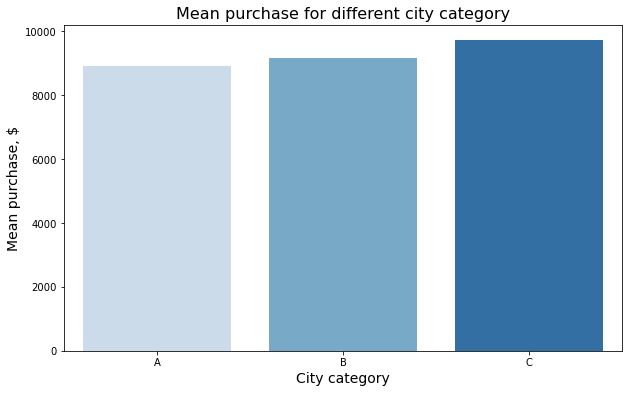

In [25]:
data5 = train.groupby('City_Category', as_index=False).agg({'Purchase': 'mean'})
create_barplot(x=data5['City_Category'], y=data5['Purchase'], xlabel='City category', ylabel='Mean purchase, $',
               title='Mean purchase for different city category')

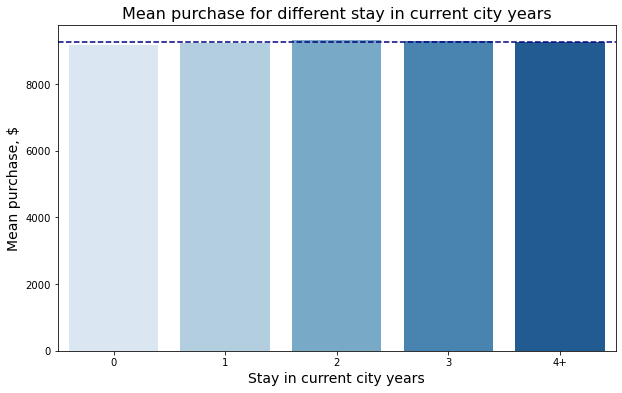

In [26]:
data6 = train.groupby('Stay_In_Current_City_Years', as_index=False).agg({'Purchase': 'mean'})
create_barplot(x=data6['Stay_In_Current_City_Years'], y=data6['Purchase'], xlabel='Stay in current city years',
               ylabel='Mean purchase, $', title='Mean purchase for different stay in current city years', axhline=data6['Purchase'].mean())

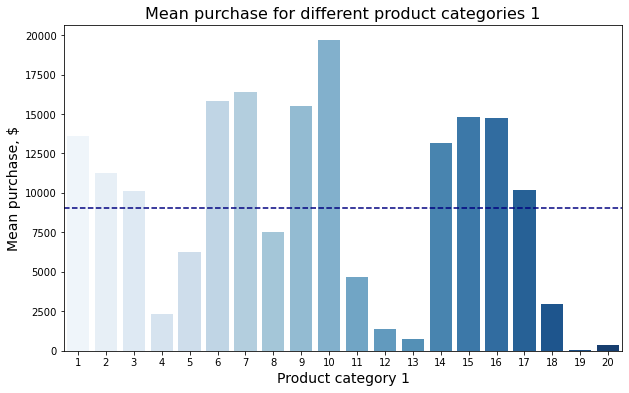

In [27]:
data7 = train.groupby('Product_Category_1', as_index=False).agg({'Purchase': 'mean'})
create_barplot(x=data7['Product_Category_1'], y=data7['Purchase'], xlabel='Product category 1',
               ylabel='Mean purchase, $', title='Mean purchase for different product categories 1',
               axhline=np.mean(data7['Purchase']))

In [28]:
def product_category_1(x):
    if x in [1, 2, 3, 6, 7, 9, 10, 14, 15, 16, 17]:
        return 2
    elif x in [5, 8, 11, 18]:
        return 1
    else:
        return 0

train['Category_1'] = train['Product_Category_1'].apply(product_category_1)
test['Category_1'] = test['Product_Category_1'].apply(product_category_1)

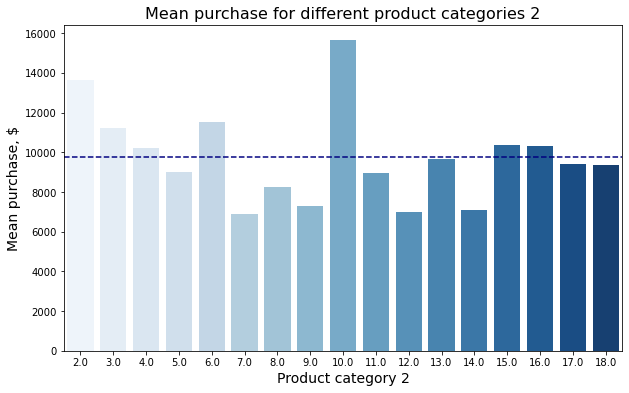

In [29]:
data8 = train.groupby('Product_Category_2', as_index=False).agg({'Purchase': 'mean'})
create_barplot(x=data8['Product_Category_2'], y=data8['Purchase'], xlabel='Product category 2',
               ylabel='Mean purchase, $', title='Mean purchase for different product categories 2',
               axhline=np.mean(data8['Purchase']))

In [30]:
def product_category_2(x):
    if x in [2.0, 10.0]:
        return 2
    elif x in [3.0, 4.0, 6.0, 15.0, 16.0]:
        return 1
    else:
        return 0

train['Category_2'] = train['Product_Category_2'].apply(product_category_2)
test['Category_2'] = test['Product_Category_2'].apply(product_category_2)

In [31]:
# Define X, y and test_X
X = train.drop(columns='Purchase')
y = train['Purchase']
test_X = test.copy()

In [32]:
# Types of columns
X.dtypes

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
category_of_ages                int64
Occupation_category             int64
Category_1                      int64
Category_2                      int64
dtype: object

In [33]:
X['Product_Category_2'] = X['Product_Category_2'].astype('int')

In [34]:
# Coding categorical features
cols_type = X.dtypes.reset_index().rename(columns={'index': 'columns',
                                       0: 'type_of_columns'})
obj_cols = list(cols_type[cols_type['type_of_columns'] == 'object']['columns'])[1:]
obj_cols

['Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years']

In [35]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
enc.fit(X[obj_cols])
X_transformed = enc.transform(X[obj_cols])
test_X_transformed = enc.transform(test_X[obj_cols])

In [36]:
X_transformed = pd.DataFrame(X_transformed, columns=enc.feature_names_in_)
test_X_transformed = pd.DataFrame(test_X_transformed, columns=enc.feature_names_in_)

In [37]:
X = X.drop(columns=obj_cols)
test_X = test_X.drop(columns=obj_cols)

In [38]:
X = pd.concat([X, X_transformed], axis=1)
test_X = pd.concat([test_X, test_X_transformed], axis=1)

In [39]:
X.head()

,User_ID,Product_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,category_of_ages,Occupation_category,Category_1,Category_2,Gender,Age,City_Category,Stay_In_Current_City_Years
0,1000001,P00069042,10,0,3,8,0,0,2,0,0.0,0.0,0.0,2.0
1,1000001,P00248942,10,0,1,6,0,0,2,1,0.0,0.0,0.0,2.0
2,1000001,P00087842,10,0,12,8,0,0,0,0,0.0,0.0,0.0,2.0
3,1000001,P00085442,10,0,12,14,0,0,0,0,0.0,0.0,0.0,2.0
4,1000002,P00285442,16,0,8,8,1,1,1,0,1.0,6.0,2.0,4.0


In [40]:
X = X.drop(columns='Product_ID')
test_X = test_X.drop(columns='Product_ID')

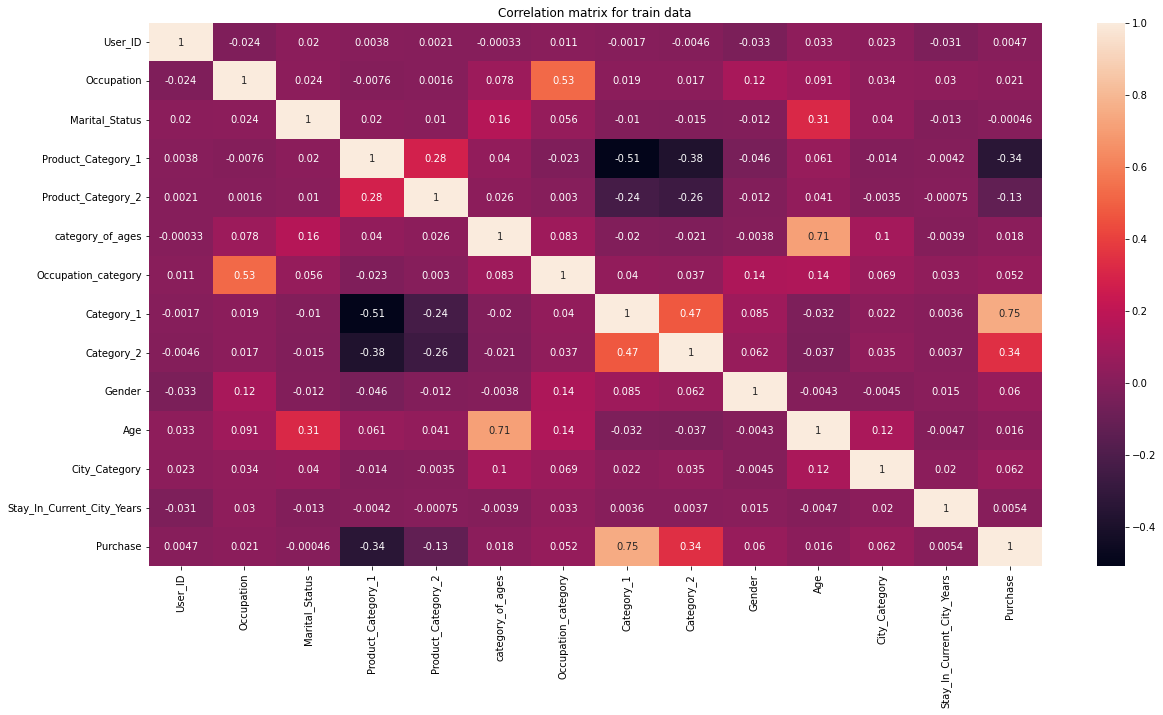

In [41]:
# Create correlation matrix
X_for_mat = pd.concat([X, y], axis=1)
corr_mat = X_for_mat.corr()
plt.figure(figsize=(20, 10))
sns.heatmap(corr_mat, annot=True)
plt.title('Correlation matrix for train data')
plt.show()

### Building a model

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1)

In [51]:
%%time

gbr = GradientBoostingRegressor(random_state=1, loss='squared_error', learning_rate=0.1,
                                n_estimators=100, criterion='squared_error’')
rfr = RandomForestRegressor(random_state=1, n_estimators=100, criterion='squared_error')
xgb = XGBRegressor(random_state=1, n_estimators=100, learning_rate=0.1, booster='gbtree')
lgbm = LGBMRegressor(random_state=1, boosting_type ='gbdt', num_leaves=31, learning_rate=0.1,
                     n_estimators=100)

model_names = ['GradientBoostingRegressor', 'RandomForestRegressor', 'XGBRegressor', 'LGBMRegressor']
models_list = [gbr, rfr, xgb, lgbm]

trained_models = []
for i in range(len(models_list)):
    print('Model: {}'.format(model_names[i]))
    model = models_list[i].fit(X_train, y_train)
    trained_models.append(model)
    # create prediction
    prediction = model.predict(X_test)
    metric = np.sqrt(mean_squared_error(y_test, prediction))
    print('RMSE ({}) = {}\n'.format(model_names[i], metric))
print('Completed!')

Model: GradientBoostingRegressor
RMSE (GradientBoostingRegressor) = 2986.6843537107948

Model: RandomForestRegressor
RMSE (RandomForestRegressor) = 2968.7260759766273

Model: XGBRegressor
RMSE (XGBRegressor) = 2850.2855058583327

Model: LGBMRegressor
RMSE (LGBMRegressor) = 2921.8704261000757

Completed!
CPU times: user 4min 15s, sys: 5.26 s, total: 4min 20s
Wall time: 3min 23s


### Create submission

In [67]:
sample_submission.head()

,Purchase,User_ID,Product_ID
0,100,1000004,P00128942
1,100,1000009,P00113442
2,100,1000010,P00288442
3,100,1000010,P00145342
4,100,1000011,P00053842


In [68]:
predictions = []
for i in range(len(trained_models)):
    model = trained_models[i]
    prediction = model.predict(test_X)
    predictions.append(prediction)

result_prediction = (predictions[0] + predictions[1] + predictions[2] + predictions[3]) / 4

In [72]:
data = {
    'Purchase': result_prediction,
    'User_ID': test['User_ID'],
    'Product_ID': test['Product_ID']
}

result_df = pd.DataFrame(data)
result_df.to_csv('my_submission.csv', index=False)